In [1]:
import numpy as np
from sklearn import metrics
from sklearn_evaluation import plot as sk_plot
import matplotlib.pyplot as plt

from yass.neuralnetwork import NeuralNetTriage

In [11]:
path_to_model = '/home/Edu/dev/private-yass/nnet/models/triage-12-Jul-2018@00-27-20.ckpt'
triage = NeuralNetTriage.load(path_to_model, 0.5)

In [12]:
x_test = (path_to_model.replace('triage-', 'x-triage-')
          .replace('.ckpt', '.npy'))
y_test = (path_to_model.replace('triage-', 'y-triage-')
          .replace('.ckpt', '.npy'))

In [13]:
print(x_test, y_test)

/home/Edu/dev/private-yass/nnet/models/x-triage-12-Jul-2018@00-27-20.npy /home/Edu/dev/private-yass/nnet/models/y-triage-12-Jul-2018@00-27-20.npy


In [14]:
x_test = np.load(x_test)
y_test = np.load(y_test)

In [15]:
y_pred = triage.predict(x_test)
y_true = y_test

print(metrics.classification_report(y_true, y_pred))

             precision    recall  f1-score   support

        0.0       0.99      0.97      0.98     20008
        1.0       0.97      0.99      0.98     20008

avg / total       0.98      0.98      0.98     40016



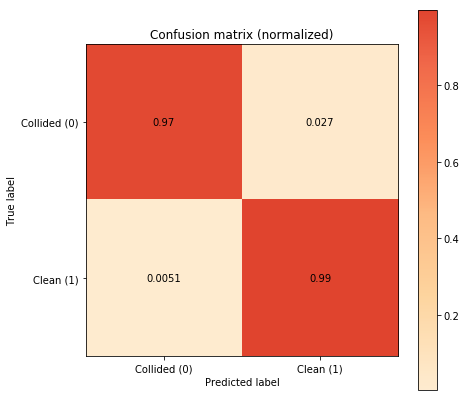

In [16]:
plt.rcParams['figure.figsize'] = (7, 7)
sk_plot.confusion_matrix(y_true, y_pred, target_names=['Collided (0)', 'Clean (1)'],
                        normalize=True)

In [17]:
_ = metrics.confusion_matrix(y_true, y_pred)
cm = _ / _.sum(axis=1)
tn, fp, fn, tp = cm.flatten()
tn, fp, fn, tp

(0.9731107556977209,
 0.026889244302279087,
 0.00509796081567373,
 0.9949020391843263)

In [18]:
metrics.accuracy_score(y_true, y_pred)

0.9840063974410236

In [11]:
metrics.f1_score(y_true, y_pred)

0.9841787797883912

In [12]:
metrics.recall_score(y_true, y_pred)

0.9949020391843263

In [13]:
metrics.precision_score(y_true, y_pred)

0.9736842105263158